## Лабораторная работа №2
### Итерационные методы решения СЛАУ
#### Вариант 5
#### Выполнил студент 14 группы 2 курса
#### Гордей Павел Дмитриевич

#### Задание 2. Метод релаксации 1

$
A = \left(
\begin{array}{}
-1&1&-1\\
-1&4&-2\\
 2&-3&5\\
\end{array}
\right)
$

1. Написать программу, которая решает СЛАУ _Ax = b_ методом релаксаций
(в качестве вектора <i>b</i> взять вектор, соответствующий какому-нибудь
заданному значению <i>x</i>). Экспериментально подобрать значение параметра
<i>w</i>, при котором итерационный процесс сходится (_w<sub>1</sub>_),
а также значение, при котором он расходится (_w<sub>0</sub>_).

Возьмем вектор <i>b</i> = (-1, 1, 4)<sup>T</sup>, который соответствует
<i>x</i> = (1, 1, 1)<sup>T</sup>

Основной класс задания:

In [10]:
import copy
import numpy as np


class Slae:
    def __init__(self, A: list[list], b: list):
        self.__A = copy.deepcopy(A)
        self.__b = copy.deepcopy(b)
        if not self.__isSquare() or len(A) != len(b):
            raise Exception("Invalid input")

    def relaxation(self, w: float = 1.0, k: int = 3, init: list = None) -> list:
        e = 10 ** (-k)
        size = len(self.__b)
        if init is not None:
            if len(init) != size:
                raise Exception("Invalid input")
            x = copy.deepcopy(init)
        else:
            x = size * [0.0]
        x_next = size * [0.0]

        while np.linalg.norm(np.subtract(np.matmul(self.__A, x), self.__b), np.inf) > e:
            for i in range(size):
                sum1 = sum2 = 0.0
                for j in range(i):
                    sum1 += self.__A[i][j] * x_next[j]
                for j in range(i + 1, size):
                    sum2 += self.__A[i][j] * x[j]
                x_next[i] = (1 - w) * x[i] + (w / self.__A[i][i]) * (self.__b[i] - sum1 - sum2)
            x = x_next
            x_next = size * [0.0]

        return x

    @staticmethod
    def sparse_slae(main_diagonal: list, side_diagonal: list, b: list, k: int = 3, init: list = None) -> list:
        if len(main_diagonal) != len(side_diagonal) or len(main_diagonal) != len(b) or len(b) % 2 != 0:
            raise Exception("The size must be even")

        e = 10 ** (-k)
        size = len(b)
        if init is not None:
            if len(init) != size:
                raise Exception("Invalid input")
            x = copy.deepcopy(init)
        else:
            x = size * [10.0]
        x_next = size * [0.0]

        while np.linalg.norm(np.subtract(Slae.sparse_dot(main_diagonal, side_diagonal, x), b), np.inf) > e:
            for i in range(size):
                summa: float
                if i < size // 2:
                    summa = side_diagonal[i] * x[size - 1 - i]
                else:
                    summa = side_diagonal[i] * x_next[size - 1 - i]
                x_next[i] = (b[i] - summa) / main_diagonal[i]
            x = x_next
            x_next = size * [0.0]

        return x

    def __isSquare(self) -> bool:
        for line in self.__A:
            if len(line) != len(self.__A):
                return False
        return True

    @staticmethod
    def sparse_dot(main_diagonal: list, side_diagonal: list, x: list) -> list:
        if len(main_diagonal) != len(side_diagonal) or len(main_diagonal) != len(x) or len(x) % 2 != 0:
            raise Exception("The size must be even")
        size = len(x)
        res = size * [0]
        for i in range(size):
            res[i] = main_diagonal[i] * x[i] + side_diagonal[i] * x[size - 1 - i]
        return res

Сходится при <i>w<sub>1</sub></i> = 0.5

In [11]:
matrixA = [[-1, 1, -1],
           [-1, 4, -2],
           [2, -3, 5]]
vectorB = [-1, 1, 4]
slae = Slae(matrixA, vectorB)
print(slae.relaxation(w=0.5, k=5))

[0.9999956277947262, 1.000003223683153, 1.000005295031451]


Не сходится при <i>w<sub>0</sub></i> = 1.9

In [12]:
np.seterr(all='print')
print(slae.relaxation(w=1.9, k=5))

[inf, nan, nan]


2. Путем теоретического анализа подтвердить сходимость и расходимость

В векторной форме метод релаксаций имеет вид:

$ x^{k + 1} = (1 - w)x^{k} + wD^{-1}(b - Lx^{k + 1} - Rx^{k}) $

Приводя к виду: $ x^{k + 1} = B_{w}x^{k} + g_{w} $ имеем, что:

$ B_{w} = (D + wL)^{-1}((1 - w)D - wR) $,

$ g_{w} = (D + wL)^{-1}b $

Подставив сюда исходные значения, для <i>w</i> = 0.5 имеем:

$
B_{w} = \left(
\begin{array}{}
0.5&0.5&-0.5\\
0.0625&0.5625&0.1875\\
-0.08125&0.06875&0.65625\\
\end{array}
\right)
$

Собственные значения этой матрицы:

$ \lambda_{1} = 0.75 + 0.0272 * i $

$ \lambda_{2} = 0.75 - 0.0272 * i $

$ \lambda_{3} = 0.223 $

Так как $ |\lambda_{1}| = |\lambda_{2}| = 0.7505$ и
$ |\lambda_{3}| = 0.223 $, то, действительно, итерационный процесс сходится,
ведь все собственные значения матрицы по модулю меньше единицы:
$ \rho(B) < 1$.

Аналогично для <i>w</i> = 1.9 имеем:

$
B_{w} = \left(
\begin{array}{}
-0.9&1.9&-1.9\\
-0.4275&0.0025&0.0475\\
 1.17135&-1.44685&0.48985\\
\end{array}
\right)
$

Собственные значения:

$ \lambda_{1} = -0.065 + 1.62 * i $

$ \lambda_{2} = -0.065 - 1.62 * i $

$ \lambda_{3} = -0.277 $

Отсюда видно, что $|\lambda_{1}| > 1$, поэтому итерационный процесс
не сходится.

3. Построить логарифмическую диаграмму сходимости (совмещенную) для
<i>w = w<sub>0</sub>, w<sub>1</sub>, w = 1</i> и еще двух любых
значений от 0 до 2.

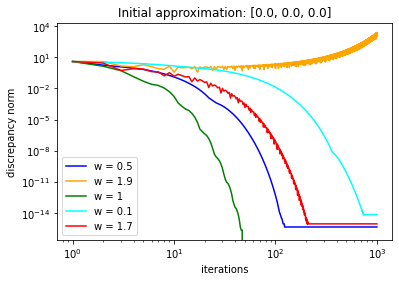

In [13]:
from matplotlib import pyplot as plt


def count_discrepancy_norms_task2(A: list[list[float]], b: list[float],
                                  w: float = 1.0, k: int = 100, init: list = None) -> list:
    discrepancy_norms = []
    size = len(b)
    if init is not None:
        if len(init) != size:
            raise Exception("Invalid input")
        x = copy.deepcopy(init)
    else:
        x = size * [0.0]
    x_next = size * [0.0]

    for _ in range(k):
        discrepancy_norms.append(np.linalg.norm(np.subtract(np.matmul(A, x), b), np.inf))
        for i in range(size):
            sum1 = sum2 = 0.0
            for j in range(i):
                sum1 += A[i][j] * x_next[j]
            for j in range(i + 1, size):
                sum2 += A[i][j] * x[j]
            x_next[i] = (1 - w) * x[i] + (w / A[i][i]) * (b[i] - sum1 - sum2)
        x = x_next
        x_next = size * [0.0]

    return discrepancy_norms


def convergence_diagram_task2(A: list[list], b: list, k: int = 100):
    d1 = count_discrepancy_norms_task2(A, b, 0.5, k)
    d2 = count_discrepancy_norms_task2(A, b, 1.9, k)
    d3 = count_discrepancy_norms_task2(A, b, 1, k)
    d4 = count_discrepancy_norms_task2(A, b, 0.1, k)
    d5 = count_discrepancy_norms_task2(A, b, 1.7, k)
    x = list(range(1, k + 1))
    ax = plt.subplots()[1]
    ax.plot(x, d1, color='blue')
    ax.plot(x, d2, color='orange')
    ax.plot(x, d3, color='green')
    ax.plot(x, d4, color='cyan')
    ax.plot(x, d5, color='red')
    ax.set_xlabel('iterations')
    ax.set_ylabel('discrepancy norm')
    ax.set_yscale('log')
    ax.set_xscale('log')
    plt.title('Initial approximation: [0.0, 0.0, 0.0]')
    plt.legend(["w = 0.5", "w = 1.9", "w = 1", "w = 0.1", "w = 1.7"], loc='lower left')
    plt.show()


convergence_diagram_task2(matrixA, vectorB, 1000)

#### Задание 5. Итерационные методы для разреженных СЛАУ особого вида

1. Написать программу, которая при данном <i>n</i> решает СЛАУ <i>Ax = b</i>
указанным в варианте методом. Здесь <i>A</i> - разреженные матрицы размерности <i>n</i>
из списка 2, указанные в варианте.

<il>
<li>Матрицу <i>A</i> следует либо хранить в одном из форматов для разреженных матриц,
либо сразу реализовать итерационный метод, учитывая известную структуру матрицы.
Хранить в памяти матрицу целиком со всеми нулями запрещено!</li>
<li>Вектор <i>b</i> выбирать таким образом, чтобы он соответствовал некоторому
заранее заданному решению.</li>
<li>Критерий остановки итераций: $
||Ax^{k} - b|| < \varepsilon
$ </li>
</il>

$
A_{n} = \left(
\begin{array}{}
a&&&&&&&b\\
&\dots&&&&&\dots&\\
&&a&&&b&&\\
&&&a&b&&&\\
&&&b&a&&&\\
&\dots&&&&&\dots&\\
b&&&&&&&a\\
\end{array}
\right)
,$ где a = 3, b = -2 и n - четное (в условии a = 1, но тогда метод не сходится,
т.к. матрица не обладает свойством диагонального преобладания).

Метод Гаусса-Зейделя.

2. Подвердить правильность работы программы на примере
нескольких СЛАУ размерности 5-10.

Пусть вектор <i>b</i> = (1, 1, ..., 1)<sup>T</sup>, что соответствует
<i>x</i> = (1, 1, ..., 1)<sup>T</sup>.

In [14]:
for s in range(6, 11, 2):
    print(Slae.sparse_slae([3 for _ in range(s)], [-2 for _ in range(s)], [1 for _ in range(s)]))

[1.0003564191523813, 1.0003564191523813, 1.0003564191523813, 1.0002376127682542, 1.0002376127682542, 1.0002376127682542]
[1.0003564191523813, 1.0003564191523813, 1.0003564191523813, 1.0003564191523813, 1.0002376127682542, 1.0002376127682542, 1.0002376127682542, 1.0002376127682542]
[1.0003564191523813, 1.0003564191523813, 1.0003564191523813, 1.0003564191523813, 1.0003564191523813, 1.0002376127682542, 1.0002376127682542, 1.0002376127682542, 1.0002376127682542, 1.0002376127682542]


3. Построить диаграмму сходимости (общую) для <i>n</i> = 100, 1000, 10000.

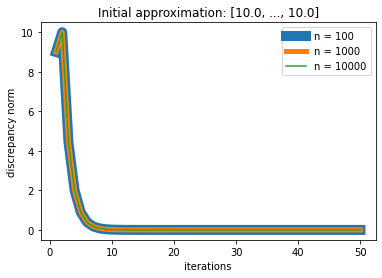

In [15]:
def count_discrepancy_norms_task5(main_diagonal: list,
                                  side_diagonal: list, b: list, k: int = 100, init: list = None):
    if len(main_diagonal) != len(side_diagonal) or len(main_diagonal) != len(b) or len(b) % 2 != 0:
        raise Exception("The size must be even")

    size = len(b)
    discrepancy_norms = []
    if init is not None:
        if len(init) != size:
            raise Exception("Invalid input")
        x = copy.deepcopy(init)
    else:
        x = size * [10.0]
    x_next = size * [0.0]

    for _ in range(k):
        discrepancy_norms.append(np.linalg.norm
                                 (np.subtract(Slae.sparse_dot(main_diagonal, side_diagonal, x), b), np.inf))
        for i in range(size):
            summa: float
            if i < size // 2:
                summa = side_diagonal[i] * x[size - 1 - i]
            else:
                summa = side_diagonal[i] * x_next[size - 1 - i]
            x_next[i] = (b[i] - summa) / main_diagonal[i]
        x = x_next
        x_next = size * [0.0]

    return discrepancy_norms


def convergence_diagram_task5(k: int):
    d1 = count_discrepancy_norms_task5([3 for _ in range(100)], [-2 for _ in range(100)], [1 for _ in range(100)], k)
    d2 = count_discrepancy_norms_task5([3 for _ in range(1000)], [-2 for _ in range(1000)], [1 for _ in range(1000)], k)
    d3 = count_discrepancy_norms_task5([3 for _ in range(10000)], [-2 for _ in range(10000)], [1 for _ in range(10000)], k)
    x = list(range(1, k + 1))
    plt.plot(x, d1, lw=10)
    plt.plot(x, d2, lw=5)
    plt.plot(x, d3)
    plt.xlabel('iterations')
    plt.ylabel('discrepancy norm')
    plt.legend(["n = 100", "n = 1000", "n = 10000"], loc='upper right')
    plt.title('Initial approximation: [10.0, ..., 10.0]')
    plt.show()


convergence_diagram_task5(k=50)

4. Построить диаграмму, в которой по оси абсцисс изменяется <i>n</i> = [10<sup>k / 2</sup>],
<i>k = 1, ..., 12</i>, а на оси ординат отложено время работы, которое требуется,
чтобы норма невязки не превышала 10<sup>-8</sup> (все размерности для моего варианта должны быть четными).

С помощью следующей функции засекаем время работы для каждой размерности:

In [16]:
import time


def get_time_for_n():
    time_arr = []
    n = [int(10 ** (k / 2)) for k in range(1, 13)]
    n = list(map(lambda x: x + 1 if x % 2 != 0 else x, n))
    for dim in n:
        start = time.time()
        Slae.sparse_slae([3 for _ in range(dim)], [-2 for _ in range(dim)], [1 for _ in range(dim)], 8)
        time_arr.append(time.time() - start)
    return n, time_arr


# результат работы этой функции
dimensions = [4, 10, 32, 100, 316, 1000, 3162, 10000, 31622, 100000, 316228, 1000000]
time_list = [0.0, 0.0, 0.0, 0.0, 0.015624761581420898, 0.015623092651367188,
             0.12499880790710449, 0.29686474800109863, 0.968719482421875,
             3.2186429500579834, 9.452810525894165, 29.81579041481018]

Результат:

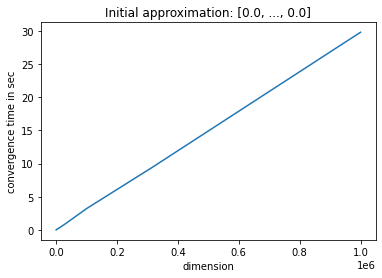

In [17]:
def time_diagram(n, time_arr):
    plt.plot(n, time_arr)
    plt.xlabel('dimension')
    plt.ylabel('convergence time in sec')
    plt.title('Initial approximation: [0.0, ..., 0.0]')
    plt.show()


time_diagram(dimensions, time_list)

#### Заключение

Таким образом были реализованы итерационные методы решения СЛАУ для обычной матрицы
и для разреженной матрицы особого вида. Хоть итерационные методы дают приближенное
решение, это не проблема, ведь при решении точными методами, такими как алгоритм
Гаусса, из-за ошибок машинного округления все равно получается приближенный результат.
Стоит отметить, что итерационные методы не будут сходиться для всех матриц, т.к.
должны выполняться некоторые условия. Тем не менее, итерационные методы широко
применяются на практике.